In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def find_movie_title(id):
    row = movies.loc[movies['movieId'] == id]
    return row['title']

In [3]:
data_path = '../raw_data/ml-25m/'
movies = pd.read_csv(data_path + 'movies.csv')
ratings = pd.read_csv(data_path + 'ratings.csv')

In [5]:
ratings = ratings.merge(movies[['movieId', 'title']], on='movieId')

In [5]:
ratings

,userId,movieId,rating,timestamp,title
0,1,296,5.0,1147880044,Pulp Fiction (1994)
1,3,296,5.0,1439474476,Pulp Fiction (1994)
2,4,296,4.0,1573938898,Pulp Fiction (1994)
3,5,296,4.0,830786155,Pulp Fiction (1994)
4,7,296,4.0,835444730,Pulp Fiction (1994)
...,...,...,...,...,...
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986)
25000091,162358,200194,2.0,1553453843,Tough Luck (2004)
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995)
25000093,162386,200726,4.0,1554651417,The Graduates (1995)


In [6]:
ratings.userId.nunique()

162541

In [7]:
ratings.movieId.nunique()

59047

In [8]:
possible_rates = ratings.rating.unique()
np.sort(possible_rates, axis=0)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [7]:
ratings.movieId.value_counts().head(10)

356     81491
318     81482
296     79672
593     74127
2571    72674
260     68717
480     64144
527     60411
110     59184
2959    58773
Name: movieId, dtype: int64

In [10]:
def get_most_rated_movies_df(ratings_df, top_number):
    most_rated_movies = ratings_df.movieId.value_counts().head(top_number).index
    return ratings_df[ratings_df.movieId.isin(most_rated_movies)].copy()

In [12]:
ratings_top = get_most_rated_movies_df(ratings, 50)
ratings_top

,userId,movieId,rating,timestamp,title
0,1,296,5.0,1147880044,Pulp Fiction (1994)
1,3,296,5.0,1439474476,Pulp Fiction (1994)
2,4,296,4.0,1573938898,Pulp Fiction (1994)
3,5,296,4.0,830786155,Pulp Fiction (1994)
4,7,296,4.0,835444730,Pulp Fiction (1994)
...,...,...,...,...,...
12008057,162533,1721,2.5,1281406171,Titanic (1997)
12008058,162534,1721,3.5,1526713829,Titanic (1997)
12008059,162538,1721,4.0,1438781404,Titanic (1997)
12008060,162539,1721,5.0,995149720,Titanic (1997)


In [13]:
rates_per_user = ratings_top.userId.value_counts()
rates_per_user

58402     50
22386     50
10361     50
112101    50
30112     50
          ..
84339      1
106770     1
122676     1
80340      1
88727      1
Name: userId, Length: 157481, dtype: int64

In [14]:
cumulative_rates_per_user = rates_per_user.cumsum()
cumulative_rates_per_user

58402          50
22386         100
10361         150
112101        200
30112         250
           ...   
84339     2544545
106770    2544546
122676    2544547
80340     2544548
88727     2544549
Name: userId, Length: 157481, dtype: int64

<AxesSubplot:ylabel='userId'>

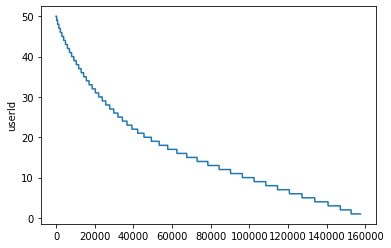

In [15]:
x_axis = list(range(1,len(rates_per_user)+1))
sns.lineplot(x=x_axis, y=rates_per_user)

<AxesSubplot:ylabel='userId'>

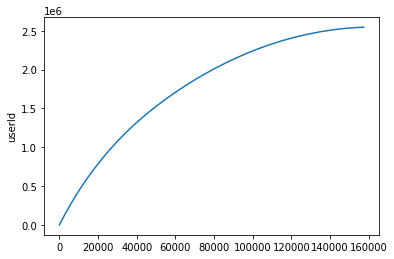

In [16]:
sns.lineplot(x=x_axis, y=cumulative_rates_per_user)

In [17]:
def get_users_with_min_num_of_ratings_df(ratings_df, min_num_of_ratings):
    rates_per_user = ratings_df.userId.value_counts()
    bolean_users_with_min_num_of_ratings = ratings_df.userId.value_counts() >= min_num_of_ratings
    users_with_min_num_of_ratings = rates_per_user[bolean_users_with_min_num_of_ratings].index
    return ratings_df[ratings_df.userId.isin(users_with_min_num_of_ratings)].copy()

In [19]:
def get_users_with_num_of_ratings_df(ratings_df, num_of_ratings):
    rates_per_user = ratings_df.userId.value_counts()
    bolean_users_with_num_of_ratings = ratings_df.userId.value_counts() == num_of_ratings
    users_with_num_of_ratings = rates_per_user[bolean_users_with_num_of_ratings].index
    return ratings_df[ratings_df.userId.isin(users_with_num_of_ratings)].copy()

In [20]:
ratings_top_users_top = get_users_with_num_of_ratings_df(ratings_top, 20)
ratings_top_users_top

,userId,movieId,rating,timestamp,title
6,10,296,4.5,1227571308,Pulp Fiction (1994)
30,62,296,4.5,1148504842,Pulp Fiction (1994)
40,82,296,2.5,1437237189,Pulp Fiction (1994)
47,101,296,3.5,1457357502,Pulp Fiction (1994)
76,158,296,5.0,835484979,Pulp Fiction (1994)
...,...,...,...,...,...
12007931,162052,1721,4.0,1451167846,Titanic (1997)
12007944,162119,1721,4.0,997307617,Titanic (1997)
12007982,162269,1721,4.5,1105577406,Titanic (1997)
12008003,162347,1721,3.5,1237072843,Titanic (1997)


In [21]:
df = ratings_top_users_top.pivot(index='userId', columns='title', values='rating')
df

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
10,NaN,3.0,NaN,4.0,NaN,3.0,4.0,NaN,NaN,3.5,...,5.0,5.0,5.0,4.0,NaN,NaN,3.5,3.5,4.0,5.0
62,NaN,NaN,5.0,NaN,NaN,NaN,4.5,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
64,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,NaN,...,5.0,5.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
82,NaN,NaN,3.5,NaN,NaN,NaN,3.5,NaN,NaN,3.5,...,NaN,NaN,NaN,1.5,NaN,NaN,4.0,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,...,5.0,5.0,NaN,4.0,5.0,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162344,NaN,3.5,NaN,3.5,4.0,4.0,3.5,NaN,NaN,NaN,...,NaN,NaN,4.0,4.5,NaN,NaN,3.5,3.0,NaN,NaN
162347,4.0,3.5,NaN,NaN,NaN,NaN,5.0,NaN,4.5,NaN,...,4.5,4.5,NaN,NaN,4.5,3.5,NaN,NaN,5.0,NaN
162418,4.0,4.0,NaN,2.0,NaN,3.0,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,4.0,4.0,NaN,4.0


In [100]:
def standardize(series):
    new_series = (series - series.mean(skipna=True))
    return new_series

In [102]:
ratings_std_by_column = df.apply(standardize, axis=0)
ratings_std_by_column

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
10,NaN,-0.72974,NaN,0.094251,NaN,-0.415658,-0.060203,NaN,NaN,-0.643586,...,0.889487,0.839563,0.915541,0.052826,NaN,NaN,-0.425573,-0.007004,0.082206,0.675461
62,NaN,NaN,0.896652,NaN,NaN,NaN,0.439797,NaN,-0.243612,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175461
64,NaN,NaN,NaN,NaN,-0.99962,NaN,NaN,NaN,0.756388,NaN,...,0.889487,0.839563,0.915541,NaN,NaN,NaN,0.074427,NaN,NaN,NaN
82,NaN,NaN,-0.603348,NaN,NaN,NaN,-0.560203,NaN,NaN,-0.643586,...,NaN,NaN,NaN,-2.447174,NaN,NaN,0.074427,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,0.00038,NaN,0.939797,NaN,NaN,NaN,...,0.889487,0.839563,NaN,0.052826,1.136739,NaN,NaN,NaN,NaN,0.675461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162344,NaN,-0.22974,NaN,-0.405749,0.00038,0.584342,-0.560203,NaN,NaN,NaN,...,NaN,NaN,-0.084459,0.552826,NaN,NaN,-0.425573,-0.507004,NaN,NaN
162347,1.018485,-0.22974,NaN,NaN,NaN,NaN,0.939797,NaN,0.256388,NaN,...,0.389487,0.339563,NaN,NaN,0.636739,0.034884,NaN,NaN,1.082206,NaN
162418,1.018485,0.27026,NaN,-1.905749,NaN,-0.415658,-1.060203,0.241923,NaN,NaN,...,NaN,NaN,NaN,-0.947174,NaN,NaN,0.074427,0.492996,NaN,-0.324539


In [103]:
ratings_std_by_col_fill = ratings_std.fillna(0)

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

In [106]:
item_similarity = cosine_similarity(ratings_std_by_col_fill.T)
item_similarity.shape

(50, 50)

In [107]:
item_similarity_df = pd.DataFrame(item_similarity, index=df.columns, columns=df.columns)
item_similarity_df

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
title,,,,,,,,,,,,,,,,,,,,,
Ace Ventura: Pet Detective (1994),1.000000,0.137521,-0.046774,-0.014528,-0.016846,0.312709,-0.143001,0.029571,-0.040830,-0.078565,...,-0.017274,-0.013992,-0.019188,-0.017787,0.016623,0.055815,-0.054353,0.204166,-0.036441,-0.217336
Aladdin (1992),0.137521,1.000000,-0.022222,0.003856,-0.013694,0.150351,-0.099971,0.080191,0.006068,-0.076375,...,-0.058010,-0.038990,-0.010871,-0.025289,0.006712,0.016308,0.045120,0.095422,-0.098106,-0.171688
American Beauty (1999),-0.046774,-0.022222,1.000000,-0.032156,-0.034905,-0.025097,-0.037198,-0.016558,0.017326,0.123601,...,-0.093185,-0.085002,-0.069006,-0.052358,-0.052143,-0.098891,-0.037467,-0.047301,0.013183,0.076714
Apollo 13 (1995),-0.014528,0.003856,-0.032156,1.000000,-0.012433,0.000814,-0.006256,0.044700,-0.027208,-0.089651,...,-0.018932,-0.034464,-0.027453,-0.065094,0.005180,0.001837,0.018540,0.045300,-0.062084,-0.112998
Back to the Future (1985),-0.016846,-0.013694,-0.034905,-0.012433,1.000000,0.002363,-0.033148,-0.033251,-0.017625,-0.024096,...,-0.017830,0.001321,-0.005739,0.020494,0.016434,-0.007646,0.016477,-0.002977,0.003026,-0.047228
Batman (1989),0.312709,0.150351,-0.025097,0.000814,0.002363,1.000000,-0.161146,0.045807,-0.017917,-0.083653,...,-0.049229,-0.043894,-0.026430,-0.014478,0.002000,0.019707,-0.004742,0.230786,-0.004218,-0.164194
Braveheart (1995),-0.143001,-0.099971,-0.037198,-0.006256,-0.033148,-0.161146,1.000000,0.030916,-0.024673,-0.086603,...,-0.055019,-0.065368,-0.060186,-0.027058,-0.011027,0.029026,-0.019131,-0.122146,-0.042223,-0.022812
Dances with Wolves (1990),0.029571,0.080191,-0.016558,0.044700,-0.033251,0.045807,0.030916,1.000000,-0.018691,-0.061697,...,-0.034227,-0.033315,-0.058475,-0.060598,-0.007413,0.037791,-0.016901,0.001503,-0.090226,-0.124175
"Dark Knight, The (2008)",-0.040830,0.006068,0.017326,-0.027208,-0.017625,-0.017917,-0.024673,-0.018691,1.000000,-0.040971,...,-0.083677,-0.054654,-0.061104,0.014662,-0.044694,-0.055158,0.014519,-0.004490,-0.009277,-0.011895


In [108]:
def get_similar_movies(movie_name,user_rating):
    similar_score = item_similarity_df[movie_name]*(user_rating-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    
    return similar_score

print(get_similar_movies("Seven (a.k.a. Se7en) (1995)",5))

title
Seven (a.k.a. Se7en) (1995)                                                       2.500000
Usual Suspects, The (1995)                                                        0.306334
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                                         0.267496
Pulp Fiction (1994)                                                               0.210895
Silence of the Lambs, The (1991)                                                  0.184292
Memento (2000)                                                                    0.164732
Fight Club (1999)                                                                 0.157137
Shawshank Redemption, The (1994)                                                  0.144846
American Beauty (1999)                                                            0.090074
Sixth Sense, The (1999)                                                           0.084634
Godfather, The (1972)                                                             0.

In [109]:
movies_ratings = [("Ace Ventura: Pet Detective (1994)",5),("Gladiator (2000)",1),("Jurassic Park (1993)",1),("Lord of the Rings: The Return of the King, The (2003)",5)]

similar_movies = pd.DataFrame()

for movie,rating in movies_ratings:
    similar_movies = similar_movies.append(get_similar_movies(movie,rating),ignore_index=True)
    
similar_movies.head()
# similar_movies.sum().sort_values(ascending=False)


,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
0,2.500000,0.343802,-0.116934,-0.036321,-0.042114,0.781772,-0.357502,0.073928,-0.102076,-0.196411,...,-0.043185,-0.034980,-0.047970,-0.044469,0.041557,0.139538,-0.135882,0.510415,-0.091103,-0.543341
1,0.012654,0.007081,0.108907,0.023401,0.065686,0.032010,-0.084173,-0.023453,-0.057711,0.040634,...,0.081397,0.131608,0.053706,0.033840,0.043358,-0.049319,0.086166,-0.002222,0.033776,0.029321
2,-0.072305,-0.027526,0.114994,-0.067978,-0.014723,-0.119864,0.038365,-0.042861,0.045254,0.150130,...,-0.004765,0.043724,0.005512,-0.093115,-0.015900,-0.090829,-0.045267,-0.125487,0.116844,0.221739
3,-0.107315,-0.072208,-0.204692,-0.037605,-0.199111,-0.058397,-0.117805,-0.000056,-0.135867,-0.101781,...,-0.018202,-0.052160,0.001215,-0.191448,-0.166130,-0.067257,-0.176813,-0.024298,-0.092932,-0.148129


### User Based colaborative filter

In [101]:
ratings_std_by_row = df.apply(standardize, axis=1)
ratings_std_by_row

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
10,NaN,-1.050,NaN,-0.05,NaN,-1.05,-0.050,NaN,NaN,-0.550,...,0.950,0.950,0.95,-0.050,NaN,NaN,-0.550,-0.55,-0.050,0.95
62,NaN,NaN,0.550,NaN,NaN,NaN,0.050,NaN,-0.450,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05
64,NaN,NaN,NaN,NaN,-1.65,NaN,NaN,NaN,0.350,NaN,...,0.350,0.350,0.35,NaN,NaN,NaN,-0.650,NaN,NaN,NaN
82,NaN,NaN,0.525,NaN,NaN,NaN,0.525,NaN,NaN,0.525,...,NaN,NaN,NaN,-1.475,NaN,NaN,1.025,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,-0.60,NaN,0.400,NaN,NaN,NaN,...,0.400,0.400,NaN,-0.600,0.400,NaN,NaN,NaN,NaN,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162344,NaN,-0.400,NaN,-0.40,0.10,0.10,-0.400,NaN,NaN,NaN,...,NaN,NaN,0.10,0.600,NaN,NaN,-0.400,-0.90,NaN,NaN
162347,-0.275,-0.775,NaN,NaN,NaN,NaN,0.725,NaN,0.225,NaN,...,0.225,0.225,NaN,NaN,0.225,-0.775,NaN,NaN,0.725,NaN
162418,0.100,0.100,NaN,-1.90,NaN,-0.90,-0.900,0.1,NaN,NaN,...,NaN,NaN,NaN,-0.900,NaN,NaN,0.100,0.10,NaN,0.10


In [ ]:
ratings_std_by_row_fill = ratings_std.fillna(0)

#### Cossine similarity

In [104]:
user_similarity = cosine_similarity(ratings_std_by_row_fill)
user_similarity.shape

(3796, 3796)

In [125]:
ratings_std_by_row_fill.iloc[[-1]]

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
162532,0.0,0.0,0.0,0.0,-0.7,0.0,0.0,0.0,0.3,0.0,...,-0.2,-0.2,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
user_similarity = cosine_similarity(ratings_std_by_row_fill.iloc[:-1,:], ratings_std_by_row_fill.iloc[[-1]])
user_similarity.shape

(3795, 1)

In [131]:
pd.DataFrame(user_similarity)

,0
0,-0.088490
1,0.058464
2,0.489532
3,-0.125610
4,-0.102719
...,...
3790,-0.176952
3791,-0.151620
3792,0.014166
3793,0.003910


In [105]:
user_similarity_df = pd.DataFrame(user_similarity, index=df.index, columns=df.index)
user_similarity_df

userId,10,62,64,82,92,101,158,159,196,235,...,162167,162179,162207,162218,162269,162344,162347,162418,162426,162532
userId,,,,,,,,,,,,,,,,,,,,,
10,1.000000,0.031138,0.241562,-0.033707,0.200689,0.001872,0.274929,0.037372,0.166022,0.145789,...,-0.077738,-0.061408,-0.105579,0.095280,0.133885,0.322699,0.263242,0.138171,0.019265,-0.088490
62,0.031138,1.000000,0.119863,0.126061,-0.025270,0.028262,-0.055736,0.049286,0.019739,0.022000,...,0.021928,0.213922,0.178814,0.015319,-0.095009,-0.137800,-0.195378,-0.001870,-0.194431,0.058464
64,0.241562,0.119863,1.000000,0.016177,0.254852,0.064853,-0.014512,0.110509,-0.015830,-0.165202,...,0.103914,-0.112640,0.095767,-0.001861,-0.168760,0.065214,-0.041168,0.061366,0.028782,0.489532
82,-0.033707,0.126061,0.016177,1.000000,0.325601,-0.085758,0.255118,-0.098036,-0.030643,-0.183503,...,0.163979,-0.057827,0.149035,0.051468,-0.200923,-0.001680,0.016747,0.223774,0.062887,-0.125610
92,0.200689,-0.025270,0.254852,0.325601,1.000000,-0.093036,0.165817,-0.164830,0.114447,-0.121825,...,0.065384,-0.295312,-0.161444,-0.076132,-0.260404,0.172207,0.155280,0.327414,0.243608,-0.102719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162344,0.322699,-0.137800,0.065214,-0.001680,0.172207,0.124295,0.207671,-0.128660,0.077426,0.067689,...,-0.091484,-0.084758,-0.045933,0.156597,0.110876,1.000000,0.221761,0.181421,0.018301,-0.151620
162347,0.263242,-0.195378,-0.041168,0.016747,0.155280,0.171657,0.363294,-0.068572,0.115743,0.171995,...,-0.053817,-0.058072,-0.267280,-0.018147,0.166514,0.221761,1.000000,-0.048468,0.206057,0.014166
162418,0.138171,-0.001870,0.061366,0.223774,0.327414,-0.107831,-0.007113,-0.058838,0.089314,-0.110061,...,-0.072194,-0.096181,-0.052997,-0.078895,-0.022876,0.181421,-0.048468,1.000000,-0.026141,0.003910


In [105]:
user_similarity_df = pd.DataFrame(user_similarity, index=df.index, columns=df.index)
user_similarity_df

userId,10,62,64,82,92,101,158,159,196,235,...,162167,162179,162207,162218,162269,162344,162347,162418,162426,162532
userId,,,,,,,,,,,,,,,,,,,,,
10,1.000000,0.031138,0.241562,-0.033707,0.200689,0.001872,0.274929,0.037372,0.166022,0.145789,...,-0.077738,-0.061408,-0.105579,0.095280,0.133885,0.322699,0.263242,0.138171,0.019265,-0.088490
62,0.031138,1.000000,0.119863,0.126061,-0.025270,0.028262,-0.055736,0.049286,0.019739,0.022000,...,0.021928,0.213922,0.178814,0.015319,-0.095009,-0.137800,-0.195378,-0.001870,-0.194431,0.058464
64,0.241562,0.119863,1.000000,0.016177,0.254852,0.064853,-0.014512,0.110509,-0.015830,-0.165202,...,0.103914,-0.112640,0.095767,-0.001861,-0.168760,0.065214,-0.041168,0.061366,0.028782,0.489532
82,-0.033707,0.126061,0.016177,1.000000,0.325601,-0.085758,0.255118,-0.098036,-0.030643,-0.183503,...,0.163979,-0.057827,0.149035,0.051468,-0.200923,-0.001680,0.016747,0.223774,0.062887,-0.125610
92,0.200689,-0.025270,0.254852,0.325601,1.000000,-0.093036,0.165817,-0.164830,0.114447,-0.121825,...,0.065384,-0.295312,-0.161444,-0.076132,-0.260404,0.172207,0.155280,0.327414,0.243608,-0.102719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162344,0.322699,-0.137800,0.065214,-0.001680,0.172207,0.124295,0.207671,-0.128660,0.077426,0.067689,...,-0.091484,-0.084758,-0.045933,0.156597,0.110876,1.000000,0.221761,0.181421,0.018301,-0.151620
162347,0.263242,-0.195378,-0.041168,0.016747,0.155280,0.171657,0.363294,-0.068572,0.115743,0.171995,...,-0.053817,-0.058072,-0.267280,-0.018147,0.166514,0.221761,1.000000,-0.048468,0.206057,0.014166
162418,0.138171,-0.001870,0.061366,0.223774,0.327414,-0.107831,-0.007113,-0.058838,0.089314,-0.110061,...,-0.072194,-0.096181,-0.052997,-0.078895,-0.022876,0.181421,-0.048468,1.000000,-0.026141,0.003910


In [110]:
user_that_want_recommendation = 101

In [113]:
def get_similar_users(user_similarity_df, user_id, number_of_similar_users):
    return user_similarity_df[user_id].copy().sort_values(ascending=False).head(number_of_similar_users)

get_similar_users(user_similarity_df, user_that_want_recommendation, 10)

userId
101       1.000000
136368    0.721473
7665      0.660519
140568    0.658642
151925    0.653447
102305    0.631157
58021     0.610930
94317     0.610228
56449     0.595660
41157     0.594574
Name: 101, dtype: float64

In [115]:
def get_movies_to_predict_rate():
    pass

def get_movies_already_watched_by_user(users_movies_df, user_id):
    return users_movies_df.loc[user_id,:].dropna().copy()
    

get_movies_already_watched_by_user(df, user_that_want_recommendation)

title
Ace Ventura: Pet Detective (1994)                            1.0
Dark Knight, The (2008)                                      4.0
Fight Club (1999)                                            4.0
Forrest Gump (1994)                                          4.0
Godfather, The (1972)                                        4.0
Good Will Hunting (1997)                                     3.0
Inception (2010)                                             5.0
Indiana Jones and the Last Crusade (1989)                    3.0
Lion King, The (1994)                                        4.0
Lord of the Rings: The Fellowship of the Ring, The (2001)    3.5
Lord of the Rings: The Return of the King, The (2003)        4.0
Lord of the Rings: The Two Towers, The (2002)                3.5
Matrix, The (1999)                                           4.0
Memento (2000)                                               4.0
Pulp Fiction (1994)                                          3.5
Seven (a.k.a. Se7en

### Using KMeans to search for similaries clusters

<AxesSubplot:>

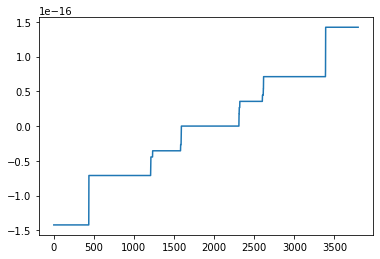

In [56]:
average_score_per_user = np.sort(ratings_std_filled.mean(axis=1),axis=0)
x_axis = list(range(1,ratings_std_filled.shape[0]+1))
sns.lineplot(x=x_axis, y=average_score_per_user)

In [73]:
from sklearn.cluster import MiniBatchKMeans, KMeans

mbkm = KMeans(n_clusters=10)
mbkm.fit(ratings_std_filled)

KMeans(n_clusters=10)

In [74]:
clusters = pd.Series(mbkm.labels_).value_counts()
clusters

2    1300
0     480
6     398
7     370
8     246
5     235
4     225
1     201
9     183
3     158
dtype: int64

<AxesSubplot:>

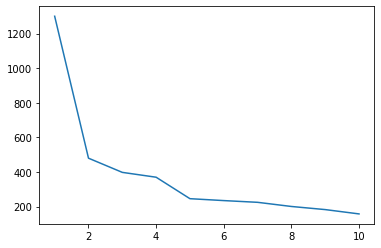

In [75]:
x_axis = list(range(1,len(clusters)+1))
sns.lineplot(x=x_axis, y=clusters)

In [80]:
def make_user_ratings(movie_ids, ratings, df):
    number_of_movies = df.shape[1]
    new_user = pd.DataFrame([np.zeros(number_of_movies)], columns=df.columns).replace(0,3)
    for movie_id, rating in zip(movie_ids,ratings):
        new_user[movie_id] = rating
    new_user_std = new_user.apply(standardize, axis=1)
    return new_user_std

In [97]:
import random

movie_names = list(df.columns)
new_user_ratings_2 = make_user_ratings(
    random.sample(movie_names, 20),
    [5 for i in range(20)],
    df
)

new_user_ratings_2

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
0,-0.8,1.2,1.2,1.2,-0.8,-0.8,-0.8,-0.8,-0.8,1.2,...,1.2,1.2,-0.8,-0.8,1.2,-0.8,-0.8,-0.8,-0.8,1.2


In [98]:
mbkm.predict(new_user_ratings_2)

array([8], dtype=int32)

- How do you determine which users or items are similar to one another?
- Given that you know which users are similar, how do you determine the rating that a user would give to an item based on the ratings of similar users?
- How do you measure the accuracy of the ratings you calculate?